In [37]:
import pandas as pd
import matplotlib.pyplot as plt

 Scarica questi dati (http://dati.ustat.miur.it/dataset/laureati) in formato csv e utilizza pandas per: 
 - caricare i dati di ciascun csv all’interno di un dataframe; 
 - creare un’aggregazione del numero di laureati per ateneo; 
 - creare un’aggregazione del numero di laureati per residenza; 
 - creare un’aggregazione del numero di laureati per sesso; 
 - creare un’aggregazione del numero di laureati per tipo di laurea; 
 - creare un’aggregazione del numero di laureati per sesso e per tipo di laurea.

In [27]:
ateneo = pd.read_csv("laureatixateneo.csv", sep=";")
ateneo

,AnnoS,AteneoCOD,AteneoNOME,SESSO,Lau
0,2020,101,Torino,F,9109
1,2020,101,Torino,M,5845
2,2020,102,Torino Politecnico,F,2301
3,2020,102,Torino Politecnico,M,5363
4,2020,201,Piemonte Orientale,F,1372
...,...,...,...,...,...
1972,2010,8701,Catania,M,2709
1973,2010,9001,Sassari,F,1150
1974,2010,9001,Sassari,M,610
1975,2010,9201,Cagliari,F,2649


In [28]:
residenza = pd.read_csv("laureatixresidenza.csv", sep=";")
residenza

,AnnoS,IstatP,ResidenzaP,SESSO,Lau
0,2020,1,TORINO,F,6512
1,2020,1,TORINO,M,5357
2,2020,2,VERCELLI,F,410
3,2020,2,VERCELLI,M,305
4,2020,3,NOVARA,F,1028
...,...,...,...,...,...
2393,2010,111,SUD SARDEGNA,M,504
2394,2010,998,PROVINCIA ESTERA,F,1553
2395,2010,998,PROVINCIA ESTERA,M,1312
2396,2010,999,PROVINCIA NON DEFINITA,F,49


In [29]:
corso = pd.read_csv("laureatixtipocorso.csv", sep=";")
corso

,AnnoS,CorsoTIPO,SESSO,Lau
0,2020,Laurea - dm 270/04,M,84357
1,2020,Laurea Specialistica a Ciclo Unico - dm 509/99,M,350
2,2020,Laurea Specialistica - dm 509/99,F,131
3,2020,Corsi di Laurea - vecchio ordinamento,F,524
4,2020,Laurea - dm 509/99,M,832
...,...,...,...,...
149,2010,Laurea - dm 270/04,M,2442
150,2010,Laurea Specialistica - dm 509/99,M,30780
151,2010,Laurea Magistrale - dm 270/04,F,5599
152,2010,Laurea - dm 270/04,F,2731


In [30]:
# ES2

ateneo[["Lau", "AteneoNOME"]].groupby("AteneoNOME").sum()

# l'indice in questo caso è diventata la colonna su cui si è fatto groupby

,Lau
AteneoNOME,
Aosta,2294
Bari,83613
Bari Politecnico,19644
Basilicata,10325
Benevento Giustino Fortunato - telematica,2074
...,...
Udine,32554
Urbino,29070
Venezia C� Foscari,49259


In [31]:
# ES3

residenza[["Lau", "ResidenzaP"]].groupby("ResidenzaP").sum()

,Lau
ResidenzaP,
AGRIGENTO,28481
ALESSANDRIA,17756
ANCONA,29353
AOSTA,6386
AREZZO,17523
...,...
VERCELLI,7625
VERONA,48705
VIBO VALENTIA,11218


In [32]:
# ES4

ateneo[["Lau", "SESSO"]].groupby("SESSO").sum()

,Lau
SESSO,
F,2005140
M,1445010


In [33]:
# ES5

corso[["Lau", "CorsoTIPO"]].groupby("CorsoTIPO").sum()

,Lau
CorsoTIPO,
Corsi di Laurea - vecchio ordinamento,80041
Laurea - dm 509/99,553503
Laurea - dm 270/04,1414358
Laurea Magistrale - dm 270/04,853938
Laurea Magistrale a Ciclo Unico - dm 270/04,292604
Laurea Specialistica - dm 509/99,168204
Laurea Specialistica a Ciclo Unico - dm 509/99,87502


In [34]:
# ES6

corso[["Lau", "CorsoTIPO", "SESSO"]].groupby(["CorsoTIPO","SESSO"]).sum()

# questi prendono il nome di databse multi-index perche hanno doppio indice

Lau
CorsoTIPO                                      SESSO        
Corsi di Laurea - vecchio ordinamento          F       58172
                                               M       21869
Laurea  - dm 509/99                            F      320063
                                               M      233440
Laurea - dm 270/04                             F      815910
                                               M      598448
Laurea Magistrale - dm 270/04                  F      484338
                                               M      369600
Laurea Magistrale a Ciclo Unico - dm 270/04    F      180972
                                               M      111632
Laurea Specialistica - dm 509/99               F       91285
                                               M       76919
Laurea Specialistica a Ciclo Unico - dm 509/99 F       54400
                                               M       33102

In [42]:
# fare l'aggregazione del numero di laureati rispetto la residenza per l'anno 2010

risultato = residenza[residenza["AnnoS"] == 2010][["Lau", "ResidenzaP"]].groupby("ResidenzaP").sum()
risultato

,Lau
ResidenzaP,
AGRIGENTO,2077
ALESSANDRIA,1549
ANCONA,2424
AOSTA,587
AREZZO,1516
...,...
VERCELLI,719
VERONA,4041
VIBO VALENTIA,1009


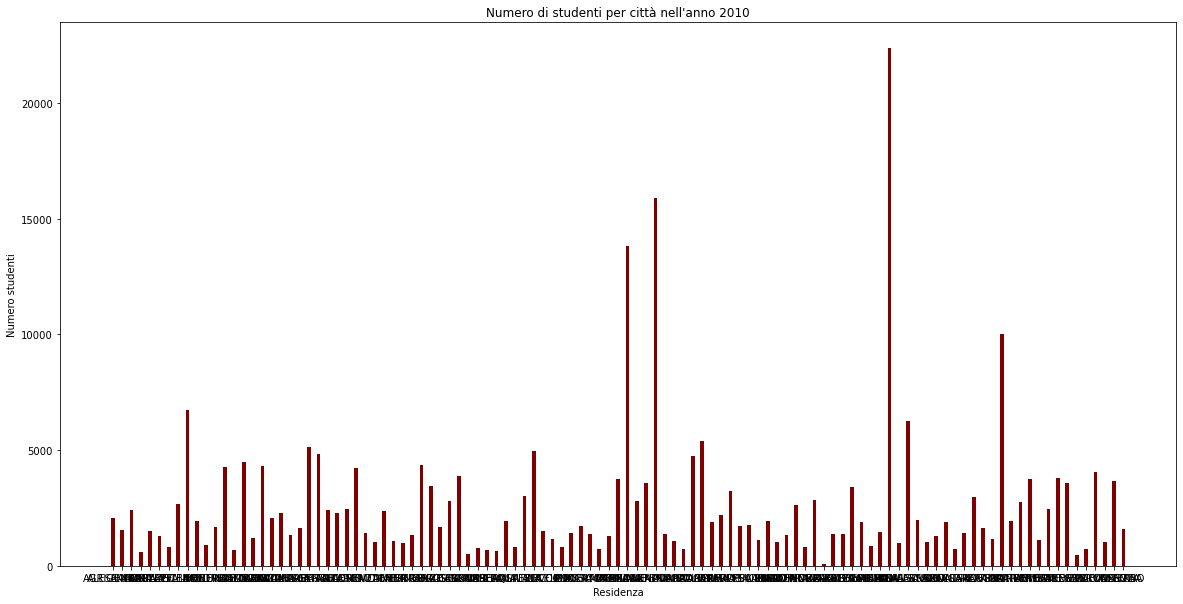

In [47]:
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(risultato.index, risultato["Lau"].values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Residenza")
plt.ylabel("Numero studenti")
plt.title("Numero di studenti per città nell'anno 2010")
plt.show()